# Report for Project 1 - Udacity Deep Reinforcement Learning Nanodegree

This notebook contains problem definition, solution and some analysis for the first project of Udacity's DRL Nanodegree


## Collecting Bananas with **Deep Q Netwroks**!


![Screenshot of Bananas](https://raw.githubusercontent.com/taesiri/udacity_drlnd_project1/master/images/banana.gif)

## 1. Problem Formulation: 

The agent is moving on a 2D surface, surrounded by walls from each side. The agent must collect YELLOW bananas while avoiding DARK bananas. Each time the agent collects a YELLOW banana, it will receive `+1`, and receives `-1` collecting DARK banana, and it receives `0` otherwise.


### State Space

A ``37`` dimensional vectors, contains Velocity of the Agent and sensory information about objects in the vicinity of the Agent.


Sample observation looks like this : 

```
 1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        
 
 ```


### Action Space

Agent can be controlled with ``4`` action inputs:

* ``0`` - move forward.
* ``1`` - move backward.
* ``2`` - turn left.
* ``3`` - turn right.


### Solve Criteria

The Environment is considered solved if the average score for ``100`` consecutive episode reaches ``13``. We also consider the task is strongly solved, if an agent scores more than ``17`` in ``100`` consecutive episodes.

## 2. Experiments and Learning Algorithms Overview

In this section, a brief overview of used algorithms are introduced

## 2.1 Q Family of Algorithms

For solving this project, Deep Q Networks (DQN) and its combination with two of its variant, (Double and Dueling) are used. Fixed Targets and Experience Replay are used for all experiments.

1. DQN: A Deep Q Networks with a vanilla update rule.
1. Double DQN: Deep Q Network with the Double update rule.
1. Dueling DQN: A Different Architecture for learning Q.
1. Dueling Double DQN: Dueling DQN with the Double update rule.

----



### 2.1.1 Deep Q Network (DQN)


![DQN](https://raw.githubusercontent.com/taesiri/udacity_drlnd_project1/master/images/dqn.jpg)


In Deep Q network or (DQN) for approximating $Q$ values we use a Deep Neural Network and train it with backpropagation. This network maps ``States`` to their $Q$ values. There are a handful of tricks for making more robust and learn faster. The default DQN used in this project have ``Fixed Q Targets``  and ``Experience Replay`` by default. 


``Fixed Q Targets``: Through each update, the estimates for each state must become closer to their Target $Q$ value, but the problem here is with successive updates, Targets are changing rapidly and the direction of loss changes on every interaction. To tackle this problem, it is proposed to keep $Q$ Targets for some number of iterations, and then update them.

``Experience Replay``: Experiences collection from trajectory is highly co-related, and hinders the learning. It is proposed to first collect a batch of experiences through interacting with the environment, then randomly sample from those experiments to learn the network.


**Update Rule**

$$ J(w) =  E [ (q_{\pi}(s, a) - \hat{q}(s, a) )^2] $$

$$ \Delta J(w) = \alpha \big(\color{red}{ R + \gamma \max\limits_{a} \hat{q} (s', a, w)} - \color{blue}{\hat{q}(s, a, w^{-})}  \big) \Delta_w \hat{q} (s, a, w)  $$


**Table of Parameters**

| Parameter           	| Value                                                                                      	|
|---------------------	|----------------------------------------------------------------------------------------------	|
| $s \in S$          	| $s$ Denotes a state.                                                                         	|
| $a \in A$          	| $a$ Denotes an action.                                                                       	|
|$R$                	| Reward.                                                                                    	|
| $\gamma$           	| Discount Factor.                                                                          	|
| $\alpha$           	| Learning Rate.                                                                             	|
| $J(w)$            	| Loss function.                                                                            	|
| $w$           	| Weights for target Q Network.                                                                  	|
| $w^{-}$               	| Weights for current (local) Q Network.                                                  	|
|$Q(s, a)$     	        | Action-value function, How good is to take action $a$ in state $s$. 	                        |



### DQN Scores

![DQN-Scores](https://raw.githubusercontent.com/taesiri/udacity_drlnd_project1/master/images/dqn-scores.png)


Highest Average Score for ``100`` episodes: ``16.91``

----

### 2.1.2 Double DQN


DQN suffers from overestimation. To tackle this problem, Double DQN is proposed. In Double DQN, we use Target Q Network value for choosing the action with the highest value but we use the $Q$ value corresponding to that action from Local Q Network.


**Update Rule**

$$ \Delta J(w) = \alpha \big(\color{red}{ R + \gamma \hat{q} (S', \color{green}{\arg\max\limits_{a} \hat{q}(S',a, w)}, w^{-})} - \color{blue}{\hat{q}(s, a, w)}  \big) \Delta_w \hat{q} (s, a, w)  $$



### Double DQN Scores


![Double DQN-Scores](https://raw.githubusercontent.com/taesiri/udacity_drlnd_project1/master/images/double-dqn-scores.png)


Highest Average Score for ``100`` episodes: ``17.18``


----

### 2.1.3 Dueling DQN


![Dueling DQN](https://raw.githubusercontent.com/taesiri/udacity_drlnd_project1/master/images/dueling-dqn.jpg)



Dueling Networks show their excellency when the action space is large. This is due to the fact when action space is large, the backpropagation signal becomes spars (all actions except for one becomes zero) and training becomes much harder and longer. In Dueling architecture, due to having two separate heads for ``Value`` and ``Advantage``,  the ``Value`` head always receive updates, no matter what action is chosen. This leads to better gradient flow and thus faster learning.

In our Banana collection environment, there are only four actions, so we don't expect to gain much higher training speed using this architecture.

**Rule for Combining $V$ and $Q$**

One head of Network gives us $V$ and the other $A$ (Advantage) for each action, the trick to combine these is to reduce the mean of ``Advantage`` for Identifiability purposes. See the paper for more information.

$$ Q= V + A  - mean(A) $$




### Dueling DQN Scores


![Dueling DQN-Scores](https://raw.githubusercontent.com/taesiri/udacity_drlnd_project1/master/images/dueling-dqn-scores.png)

<center><img src=''></center>

Highest Average Score for ``100`` episodes: ``17.23``


----

### 2.1.4 Dueling Double DQN


The output of Dueling network is ``Q`` value, so we can use the technique which are used to make DQN more stable, like Double DQN, on Dueling Networks too. 

### Dueling Double DQN Scores


![Dueling Double DQN-Scores](https://raw.githubusercontent.com/taesiri/udacity_drlnd_project1/master/images/dueling-double-dqn-scores.png)



Highest Average Score for ``100`` episodes: ``17.60``


----

## 2.2 Evolutionary Methods

Along with the Q learning algorithm, Two of BlackBox optimization algorithms from the Evolutionary family of algorithms are used for comparison. These methods directly map ``States`` to ``Actions`` and do not estimate the $Q$ value.

1. Hill Climbing
1. Cross-Entropy Method


The simple Hill Climbing can not solve the task at all. It doesn't do better than random.

### Cross-Entropy Method (CEM) Scores

![CEM Scores](https://raw.githubusercontent.com/taesiri/udacity_drlnd_project1/master/images/cem-scores.png)



Highest Average Score for ``100`` episodes: ``12.15``


----

# 3. Benchmark Results

## 3.1 Benchmark Results - Q Networks

For benchmarking, each algorithm executed ``5`` times and the average of all runs is considered. During each execution, the topology of networks as well as seeds is kept intact to have a meaningful comparison. The source of nondeterminism is the simulator (game) itself and with fixing topology and seeds, we wish to have a more meaningful and better comparison of the performance of each algorithm


### Parameters:



| Parameter           	| Value                                                                                      	|
|---------------------	|----------------------------------------------------------------------------------------------	|
| Episode Length      	| ``2000``                                                                                   	|
| Runs per Algorithm  	| ``5``                                                                                      	|
| Seed                	| ``0``                                                                                      	|



Bellow, we load the results from the benchmark file and plot it:

In [1]:
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Helpers

def load_results(file_name):
  with open(file_name, 'rb') as f:
    return pickle.load(f)
  
  
def plot_benchmark(benchmark_results, N, labels=[], title="Benchmark Results"):
  """Plot Benchmarks
  
  Params
  ======
        benchmark_results (dict): dictionary of results
        N (int): moving average window size
  """
  sns.set(style='whitegrid', context='notebook', palette='icefire')
  fig = plt.figure(figsize=(16, 8))
  ax = fig.add_subplot(111)
  
  if labels == []:
    labels = list(benchmark_results.keys())
  
  colors = ['red', 'blue', 'yellow', 'green']
  
  for i, K in enumerate(benchmark_results.keys()):
    current_benchmark = benchmark_results[K]
  
    moving_average  = [np.convolve(t, np.ones((N,))/N, mode='valid') for t in current_benchmark] 
  
    x1 = np.asarray(moving_average).mean(axis=0)
    x2 = np.asarray(moving_average).max(axis=0)
    x3 = np.asarray(moving_average).min(axis=0)

    plt.plot(x1, color=colors[i], label=labels[i])
    plt.plot(x2, color=colors[i], alpha=0.15, linestyle=':')
    plt.plot(x3, color=colors[i], alpha=0.15, linestyle=':')

    plt.fill_between(range(len(x1)), x2, x3, alpha=0.05, color=colors[i])
  
  plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=3)
  plt.title(title)
  plt.show()  

In [3]:
b_results = load_results('saved_scores/benchmark/benchmark_scores_5x_2000_1000.pkl')

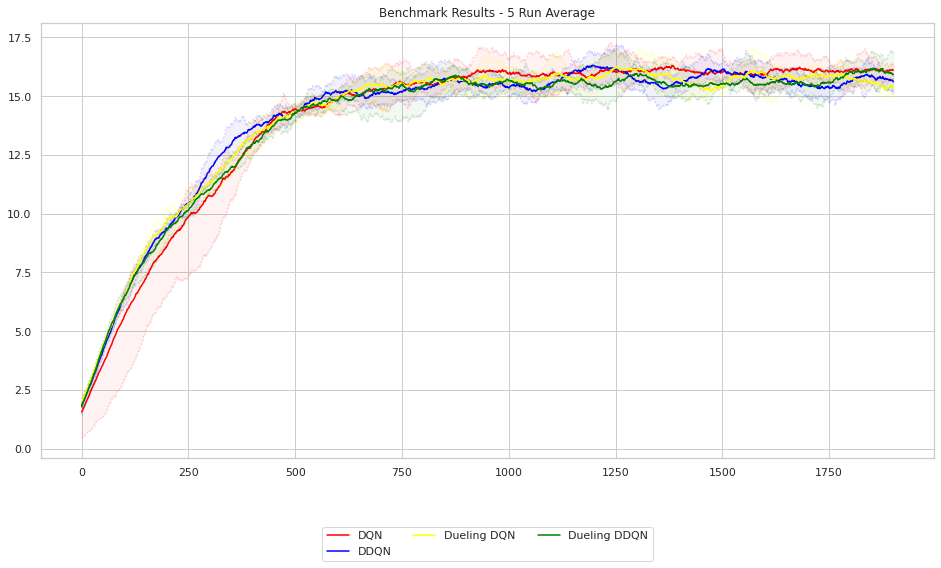

In [4]:
plot_benchmark(b_results, N=100, title="Benchmark Results - 5 Run Average")

As shown in the above graph, all algorithms can solve the task very well. With about the ``500``th episode, almost all algorithms can surpass the solve threshold of ``13`` in ``100`` consecutive episode. 

The variation of the DQN algorithm is much higher than other algorithms in the early stage of learning,and after  ``1250`` episodes, we can see this variation goes away. This is expected as the DQN tends to over/underestimate some states at the early stages of the learning.

Overall, there are no improvements after episode ``1000`` and the score plateaus.

## 3.2 Benchmark Results - Evolutionary Methods



### Parameters:

| Parameter           	| Value                                                                                      	|
|---------------------	|----------------------------------------------------------------------------------------------	|
| Episode Length      	| ``500``                                                                                   	|
| Runs per Algorithm  	| ``3``                                                                                      	|
| Seed                	| ``0``                                                                                      	|


Bellow, we load the results from the benchmark file and plot it:


In [5]:
# Loading results

es_benchmakrs = {}

cem_results = []
hill_results = []

for i in range(1, 4):
  with open(f'saved_scores/cem/cem-scores-{i}.pkl', 'rb') as f:
    cem_results.append(pickle.load(f))

  with open(f'saved_scores/hill_climbing/scores_hill_climbing_{i}.pkl', 'rb') as f:
    hill_results.append(pickle.load(f)[:500])         # Only load first 500 episode

es_benchmakrs['cem'] = cem_results
es_benchmakrs['hill'] = hill_results

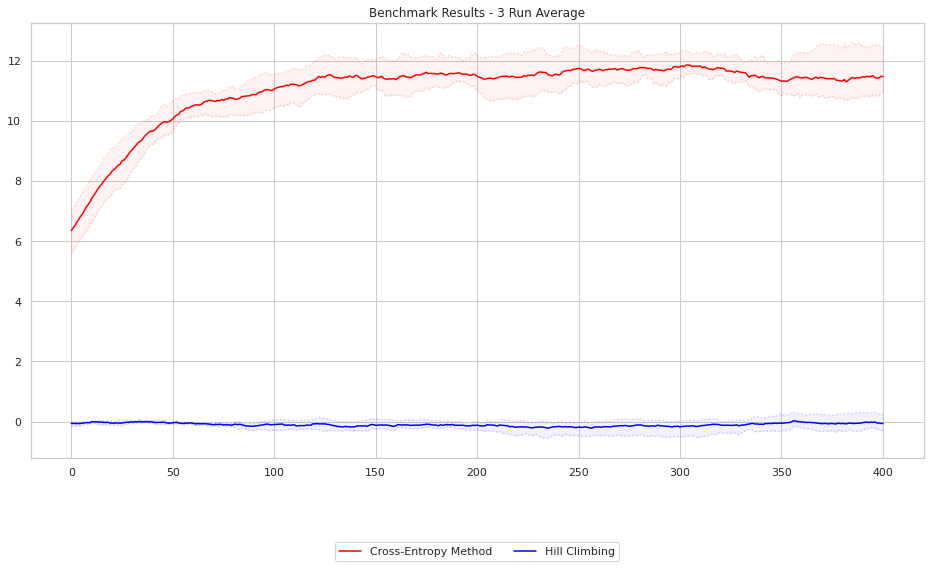

In [6]:
plot_benchmark(es_benchmakrs, N=100, labels=['Cross-Entropy Method', 'Hill Climbing'], title="Benchmark Results - 3 Run Average")

As shown in the graph, The Cross-Entropy Method shows promising results, despite having a much simpler algorithm

# 4. Agents in Action

The ``movies`` folder contains 2 record of each successful algorithm. 


### Local Minima

During final tests, I caught an interesting situation, a well-trained agent stuck in local minima and doesn't do anything afterward, except for shaking its head! Here is the video:


![Bad Local Minima](https://raw.githubusercontent.com/taesiri/udacity_drlnd_project1/master/images/local-minima.gif)


Full length video can be found here: ``movies/DuelingDoubleDQN2.mp4``

In [8]:
from IPython.display import HTML

HTML('<iframe width="560" height="315" src="//www.youtube.com/embed/3A01udy2BjU" frameborder="0" allowfullscreen></iframe>')

# 5. Ideas for Future Work

In this project, we barely scratch the surface of what is possible. There are lots of diction to continue to improve on our results. The most promising direction is implementing the ``RAINBOW`` algorithm, which combines 6 methods for improving DQN in one algorithm.

Currently, a very simple Fully Connection network is used for all networks, we can investigate the effect of network size in the training speed.

From the benchmark, The Evolutionary methods have shown interesting results. We can explore more on this by using ``NEAT`` and ``HyperNEAT`` family for solving this environment.

# 6. Sources

1. Human-level control through deep reinforcement learning. [[Nature](https://www.nature.com/articles/nature14236)]
1. Deep Reinforcement Learning with Double Q-learning. [[Arxiv](https://arxiv.org/abs/1509.06461)]
1. Dueling Network Architectures for Deep Reinforcement Learning. [[Arxiv](https://arxiv.org/abs/1511.06581)]
1. Rainbow: Combining Improvements in Deep Reinforcement Learning. [[Arxiv](https://arxiv.org/abs/1710.02298)]
1. Evolving Neural Networks through Augmenting Topologies. [[PDF](http://nn.cs.utexas.edu/downloads/papers/stanley.ec02.pdf)]
1. A Hypercube-Based Indirect Encoding for Evolving Large-Scale Neural Networks. [[PDF](http://axon.cs.byu.edu/~dan/778/papers/NeuroEvolution/stanley3**.pdf)]

Image for each algorithm taken from their corresponding paper.